# Pomysł 
Oś czasu najważniejszych wydarzeń związanych ze światem Pokemon.


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [70]:
df=pd.read_excel('timeline.xlsx')
df

,Generation,Number of Pokémons,Start,End
0,1,151,1996,1998
1,2,100,1999,2001
2,3,135,2002,2005
3,4,107,2006,2009
4,5,156,2010,2012
5,6,72,2013,2015
6,7,88,2016,2018
7,8,96,2019,2022
8,9,120,2022,2025


In [71]:

# 3. Konwersja na Datetime (zawsze 1 stycznia danego roku)
df['Start'] = pd.to_datetime(df['Start'].astype(int).astype(str) + '-01-01')
df['End'] = pd.to_datetime(df['End'].astype(int).astype(str) + '-12-31')

# 4. Obliczanie środka dla bąbelka
df['Mid'] = df['Start'] + (df['End'] - df['Start']) / 2

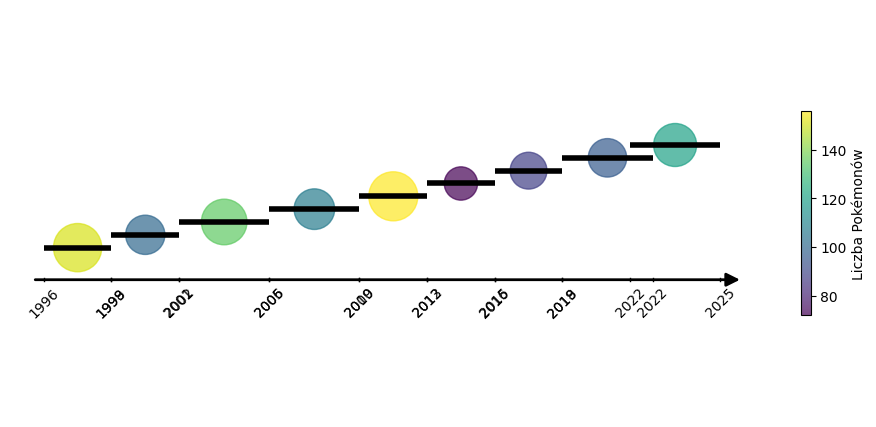

In [80]:
fig, ax= plt.subplots(figsize=(12, 6))

# Rysowanie linii czasu (trwanie generacji)
plt.hlines(y=df['Generation'], xmin=df['Start'], xmax=df['End'], 
           color='black', linewidth=4)

# Rysowanie bąbelków (środek przedziału)
plt.scatter(df['Mid'], df['Generation'], 
            s=[c*8 for c in df['Number of Pokémons']], # Skalowanie wielkości
            c=df['Number of Pokémons'], cmap='viridis', alpha=0.7)

plt.margins(y=1)
plt.colorbar(label='Liczba Pokémonów', shrink=0.5)

ax.set_axis_off()

arrow_start = df['Start'].min() - pd.DateOffset(months=6)
arrow_end = df['End'].max() + pd.DateOffset(years=1)
arrow_y = -1.5

plt.annotate('', 
             xy=(arrow_end, arrow_y), 
             xytext=(arrow_start, arrow_y),
             arrowprops=dict(arrowstyle="-|>", color='black', lw=2, mutation_scale=20),
             annotation_clip=False)

# 3. Pobieramy unikalne daty graniczne i nanosimy je na strzałkę
# Używamy zbioru (set), żeby daty się nie dublowały (koniec jednej to start drugiej)
all_dates = pd.concat([df['Start'], df['End']]).unique()
all_dates = sorted(all_dates)

for date in all_dates:
    # Mała kreska pionowa (znacznik na strzałce)
    plt.plot([date, date], [arrow_y - 0.1, arrow_y + 0.1], color='black', lw=1)
    
    # Napis z rokiem
    plt.text(date, arrow_y - 0.4, str(pd.to_datetime(date).year), 
             ha='center', va='top', fontsize=10, rotation=45)

# Opcjonalnie: podnieś dolny margines, żeby napisy się zmieściły
plt.subplots_adjust(bottom=0.2)
